In [1]:

import matplotlib.pyplot as plt
import datajoint as dj
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime

import DMS2_utils as du
from create_trials_df import create_trials_df_from_dj
from dj_utils import return_date_window, ANIMAL_IDS
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
from plot_days_info import *
from plot_trials_info import *
import plot_utils as pu


# settings
%load_ext autoreload
%autoreload 

dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")


[2023-07-12 11:06:55,259][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-07-12 11:06:55,650][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
date_min, date_max = return_date_window(latest_date=None, n_days_back=20)

In [3]:
# flex_date_min = (datetime.today() - timedelta(days=4)).strftime("%Y-%m-%d")
df = create_trials_df_from_dj(["R610"])

fetched 81 sessions for R610 between 2023-04-13 and 2023-07-12


In [4]:
dm = df.date.min()
dm2 = pd.Timestamp(2023, 4, 15).date()
dm3 = pd.Timestamp(2023, 7, 10).date()
dmax = df.date.max()
day = df.query("date == @dm")
day2 = df.query("date == @dm2")
dayl = df.query("date == @dm3")

trials_df = dayl

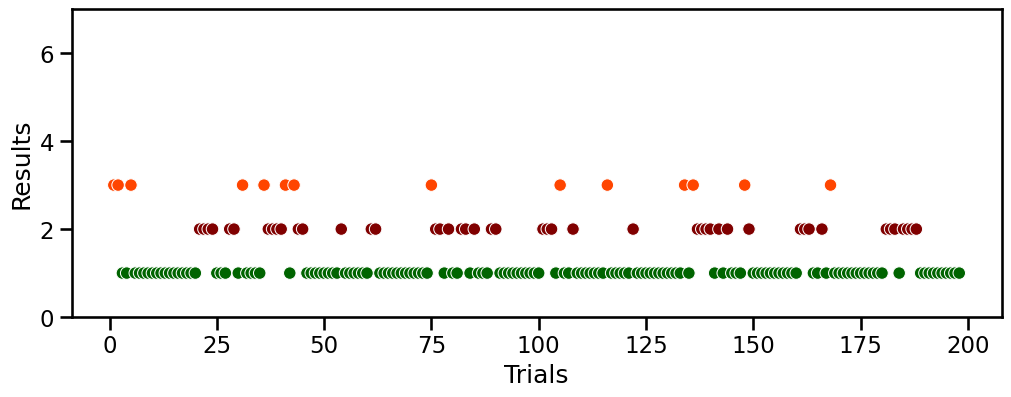

In [5]:
fig, ax = make_fig()
plot_results(trials_df, ax)

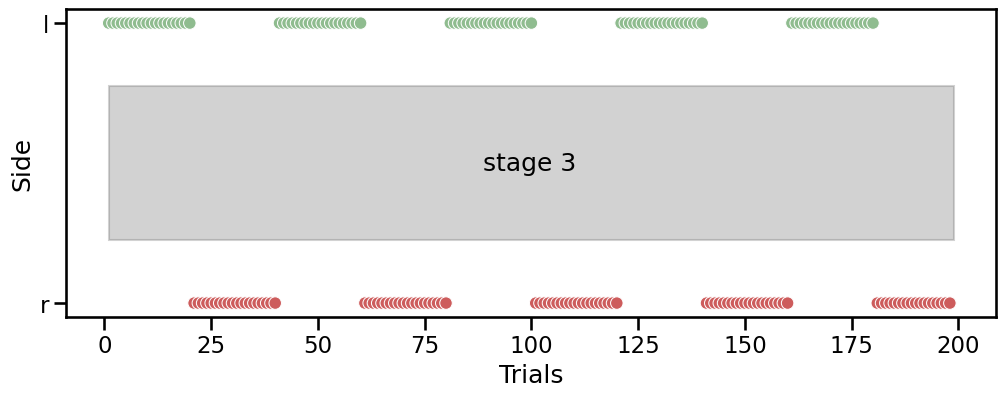

In [6]:
fig, ax = make_fig()
plot_stage_info(trials_df, ax)
plot_correct_side(trials_df, ax)

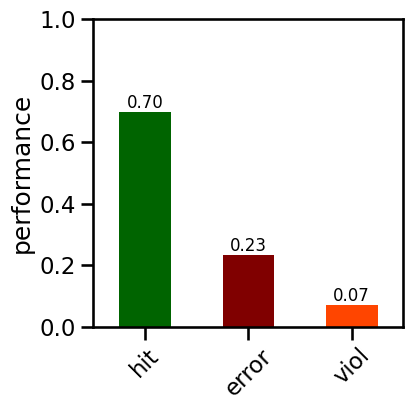

In [7]:
f, a = make_fig("s")

plot_result_summary(trials_df, a)

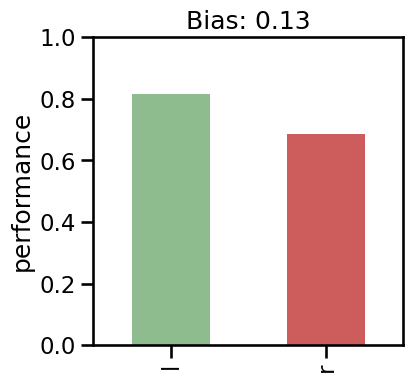

In [8]:
f, ax = make_fig("s")
plot_side_bias_summary(trials_df, ax)

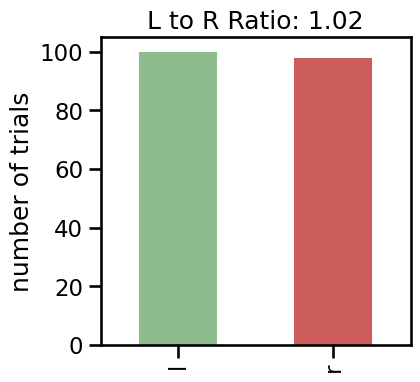

In [9]:
f, ax = make_fig("s")
plot_side_count_summary(trials_df, ax)

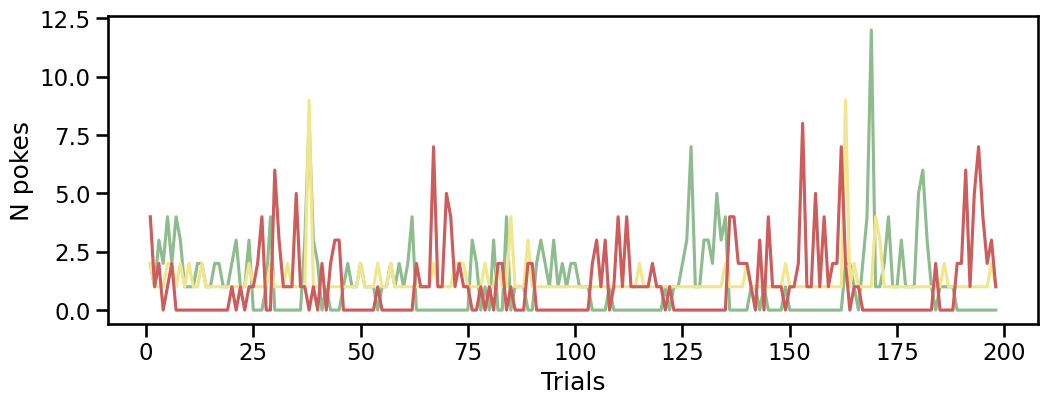

In [10]:
fig, ax = make_fig()
plot_npokes(trials_df, ax, title="", legend=False)

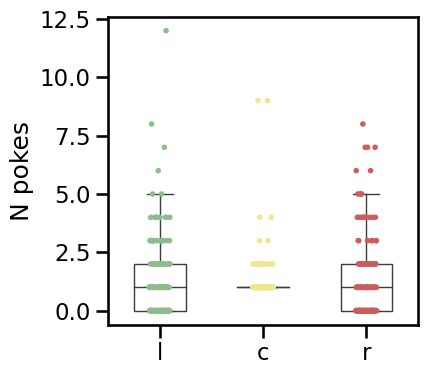

In [11]:
fig, ax = make_fig("s")
plot_npokes_summary(trials_df, ax, title="")

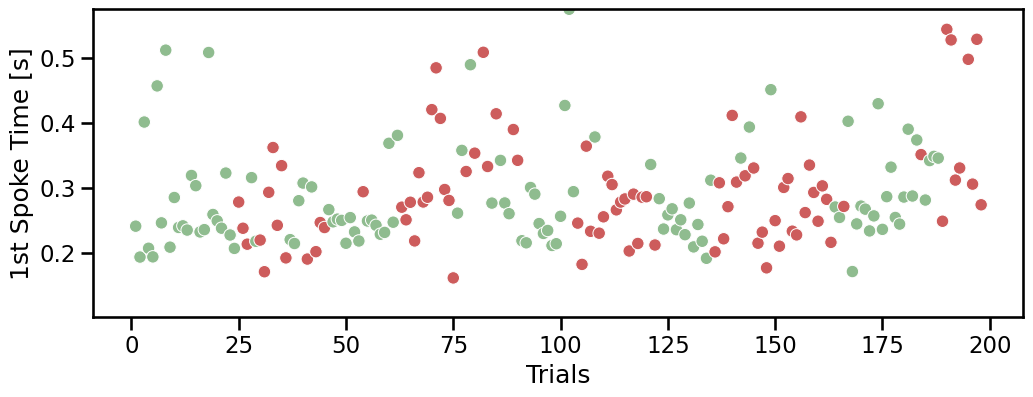

In [12]:
fig, ax = make_fig()
plot_time_to_first_spoke(trials_df, ax)

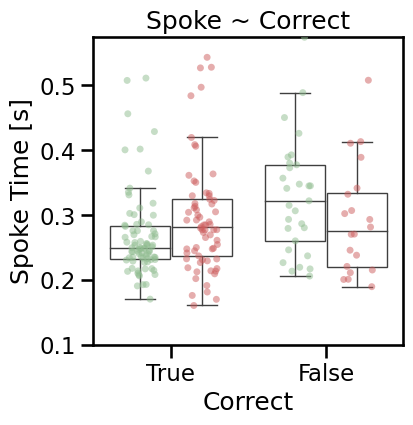

In [13]:
fig, ax = make_fig("s")

plot_first_spokes_summary_by_correct_side_and_location(
    dayl, ax, title="Spoke ~ Correct", legend=False
)

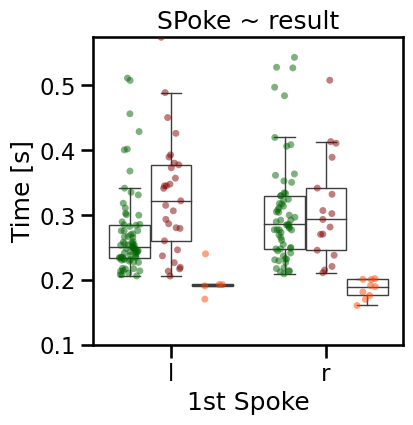

In [14]:
fig, ax = make_fig("s")

plot_first_spoke_summary_by_location_and_result(
    trials_df, ax, title="SPoke ~ result", legend=False
)

NameError: name 'plot_daily_trial_dur' is not defined

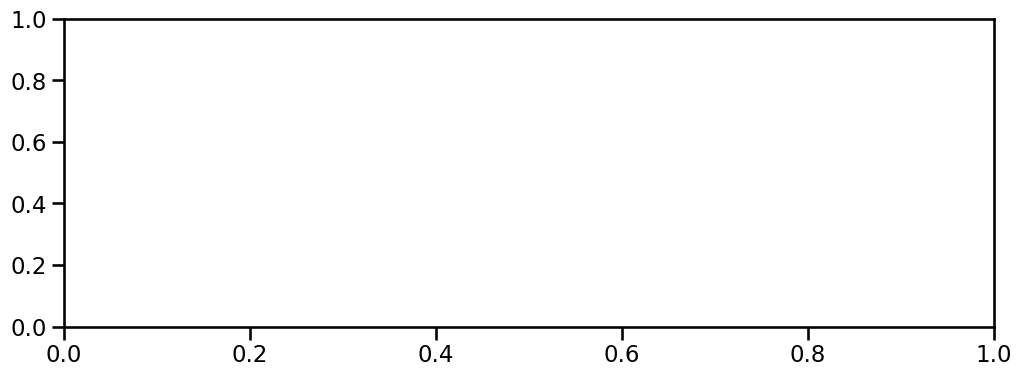

In [15]:
fig, ax = make_fig()

plot_daily_trial_dur(trials_df, ax)

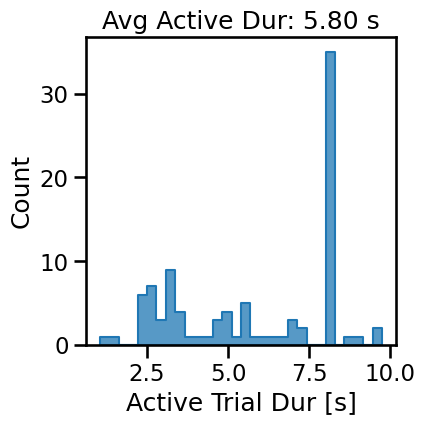

In [ ]:
fig, ax = make_fig("s")
plot_active_trial_dur_summary(trials_df, ax)

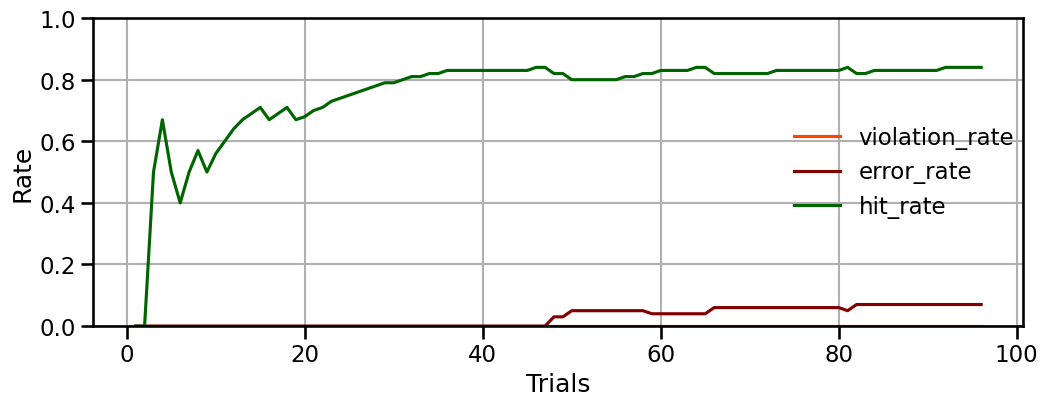

In [ ]:
f, ax = make_fig()
plot_performance_rates(trials_df, ax)

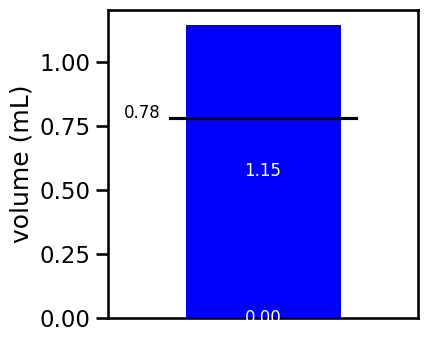

In [ ]:
fig, ax = make_fig("s")
plot_watering_amounts(dayl, ax, legend=False)

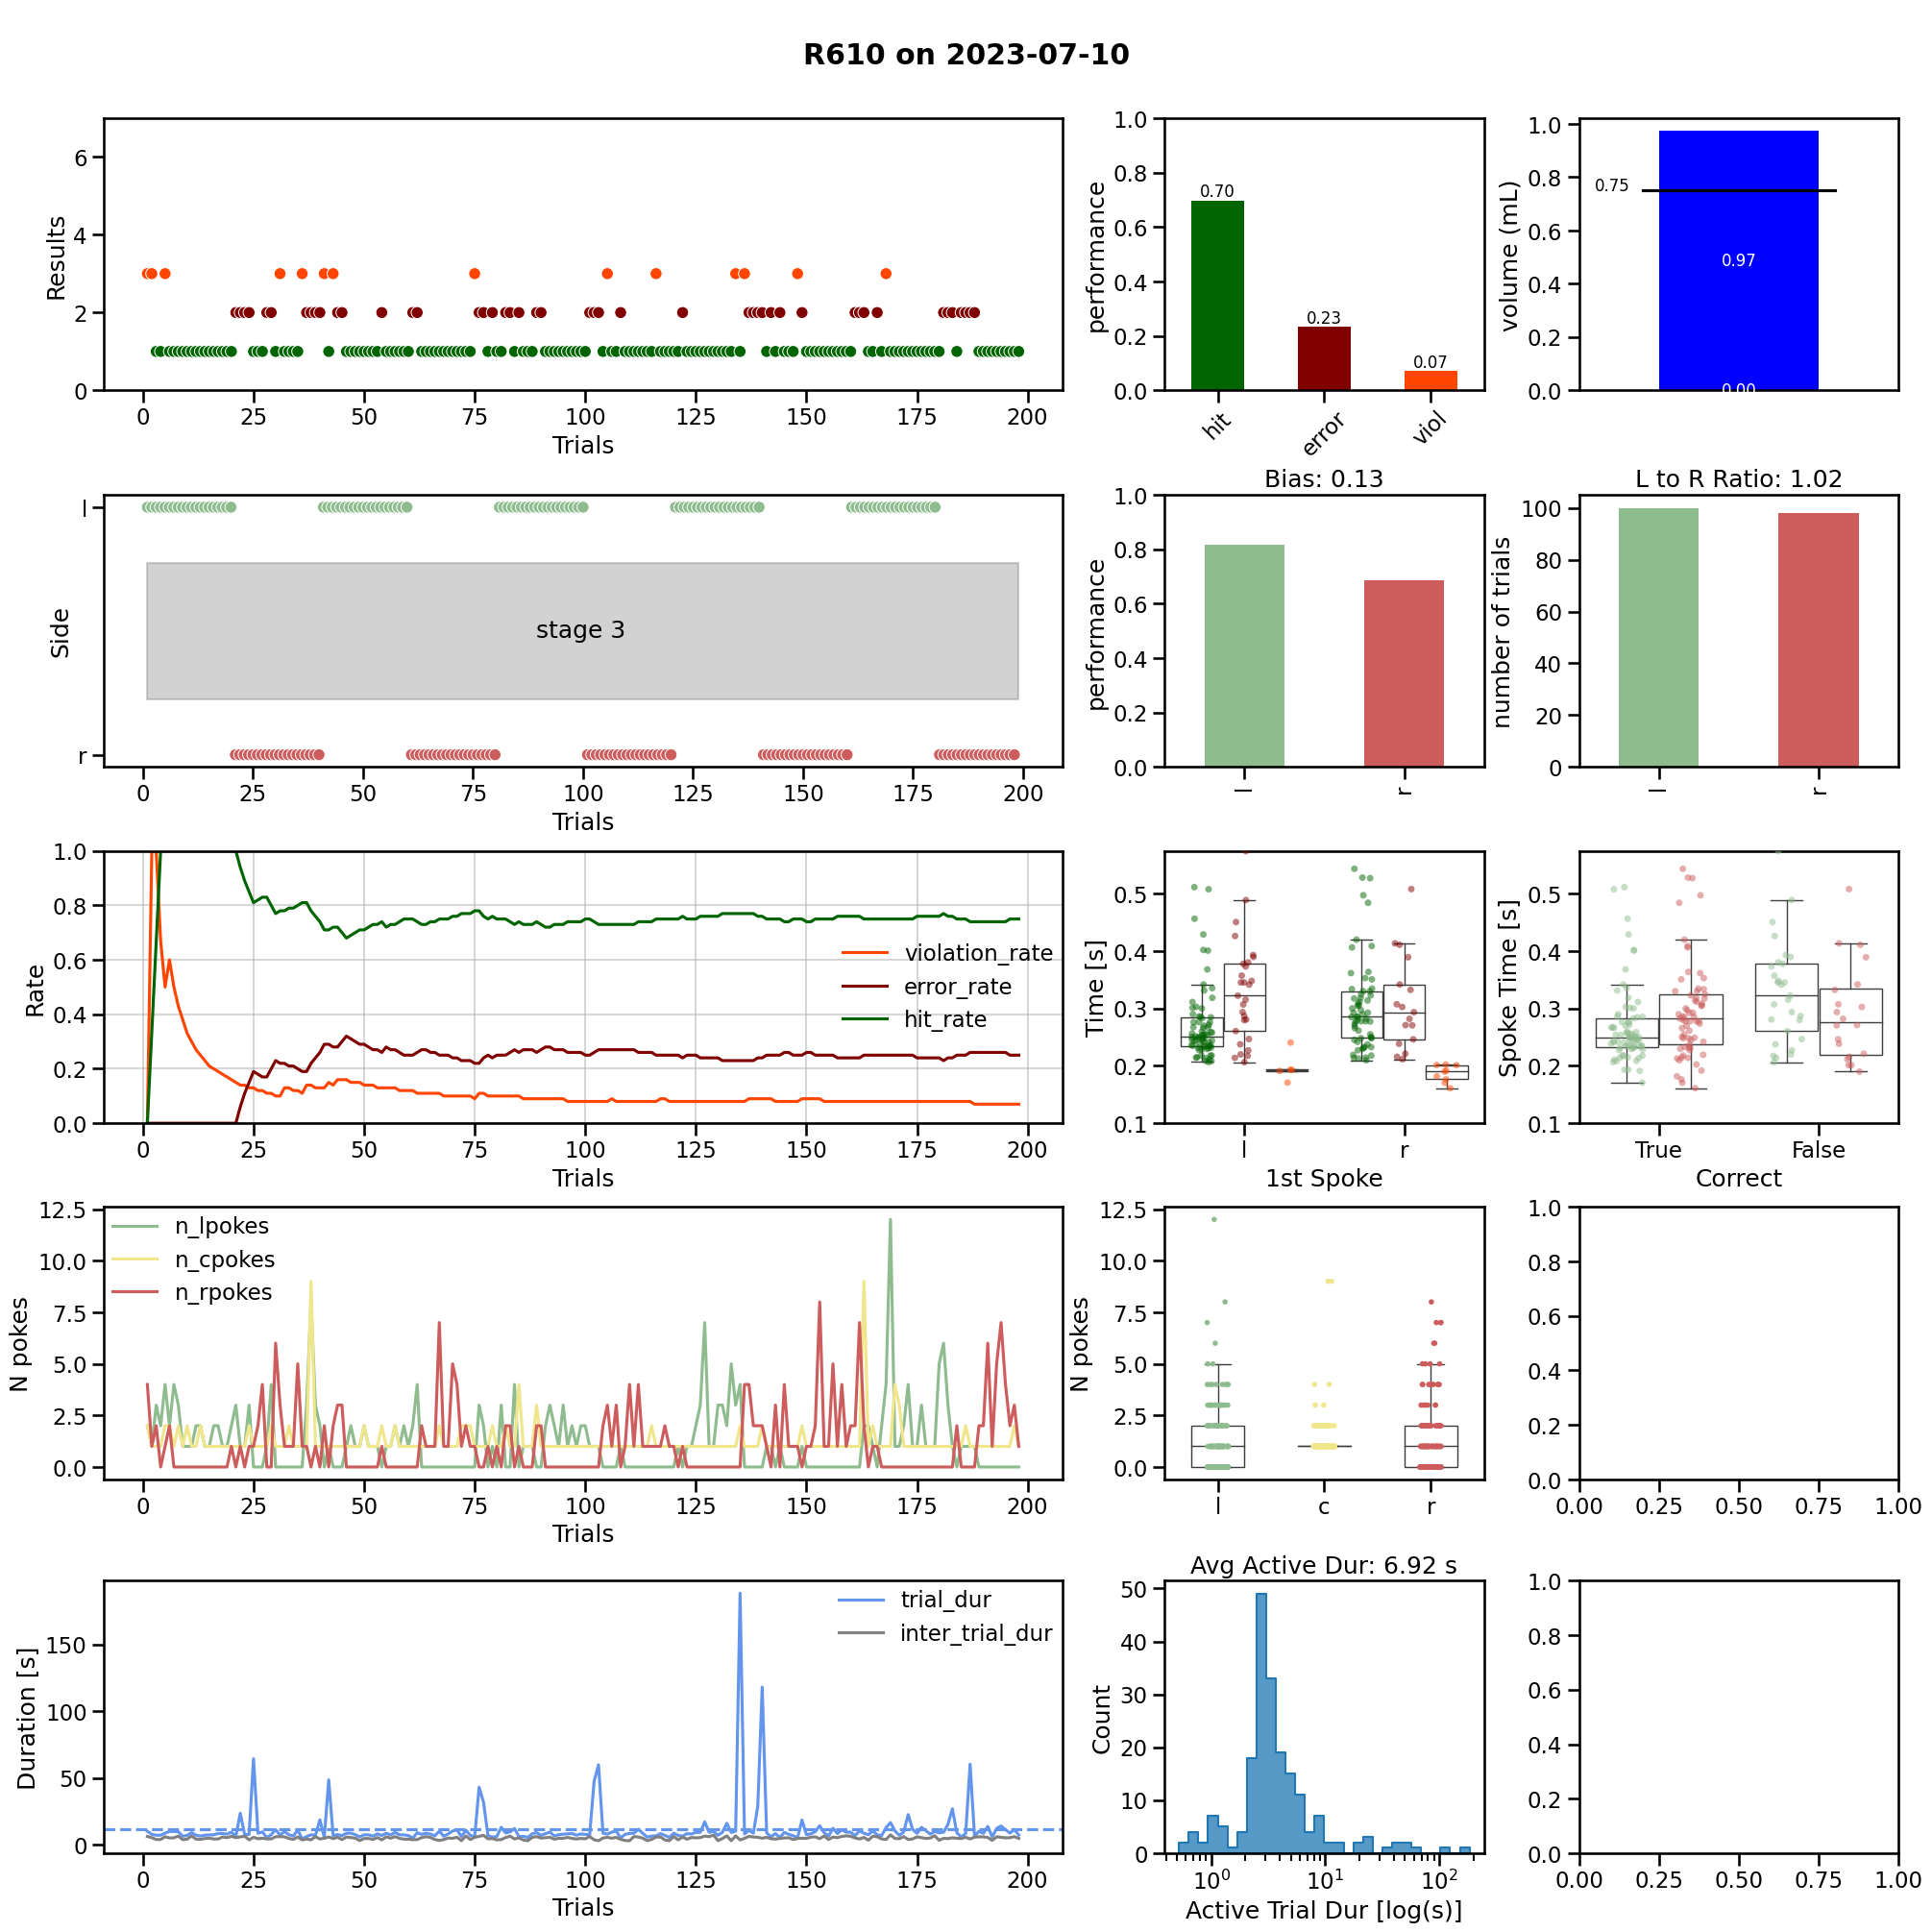

In [24]:
layout = """
    AAABC
    DDDEF
    GGGHI
    JJJKL
    MMMNP
"""
fig = plt.figure(constrained_layout=True, figsize=(20, 20))


plt.suptitle(
    f"\n{trials_df.animal_id.iloc[0]} on {trials_df.date.iloc[0]}\n",
    fontweight="semibold",
)
ax_dict = fig.subplot_mosaic(layout)  # ax to plot to
# identify_axes(ax_dict) # prints the letter for id


## ROW 1
plot_results(trials_df, ax=ax_dict["A"])
plot_result_summary(trials_df, ax=ax_dict["B"])
plot_watering_amounts(trials_df, ax=ax_dict["C"])

## ROW 2
plot_correct_side(trials_df, ax=ax_dict["D"])
plot_stage_info(trials_df, ax=ax_dict["D"])
plot_side_bias_summary(trials_df, ax=ax_dict["E"])
plot_side_count_summary(trials_df, ax=ax_dict["F"])

## ROW 3
plot_performance_rates(trials_df, ax=ax_dict["G"])
plot_first_spoke_summary_by_location_and_result(trials_df, ax=ax_dict["H"])
plot_first_spokes_summary_by_correct_side_and_location(trials_df, ax=ax_dict["I"])

## ROW 4
plot_npokes(trials_df, ax=ax_dict["J"])
plot_npokes_summary(trials_df, ax=ax_dict["K"])
# plot L here

## ROW 5
plot_trial_dur(trials_df, ax=ax_dict["M"])
plot_active_trial_dur_summary(trials_df, ax=ax_dict["N"])
# plot P here

### remaining plots
[x] l/r performance (copy over, switch putils)

[x] l/r count (copy over, switch putils)

[x] frac result (copy over, switch putils)

[x] n pokes over time

[x] swarm plot of npokes over time L/R/C

[x] time to spoke over time (copy over, switch putils)- pretty much just use this to get ready for the next plot

[x] swarm plot of time to spoke for L/R (add in mean, hue is 
hit/terror)

[x] iti/trial dur (add in hline w/ mean difference? or diff 
line)

[x] perf over trials (copy over, switch putils)
 
[x] water? 

[ ] (later) was block switch

[ ] (later) go sound give things

In [18]:
days_df = lazy_load_days_summary_df(
    date_min=date_min, date_max=datetime.today().strftime("%Y-%m-%d"), save_out=True
)

partial dj load with new date min 2023-06-19 -> 2023-07-07
Returning appended df with entries between 2023-06-19 and 2023-07-09
Saved out appended df to c:\Users\JB\github\jbreda_animal_training\code\training_performance\days_df.csv


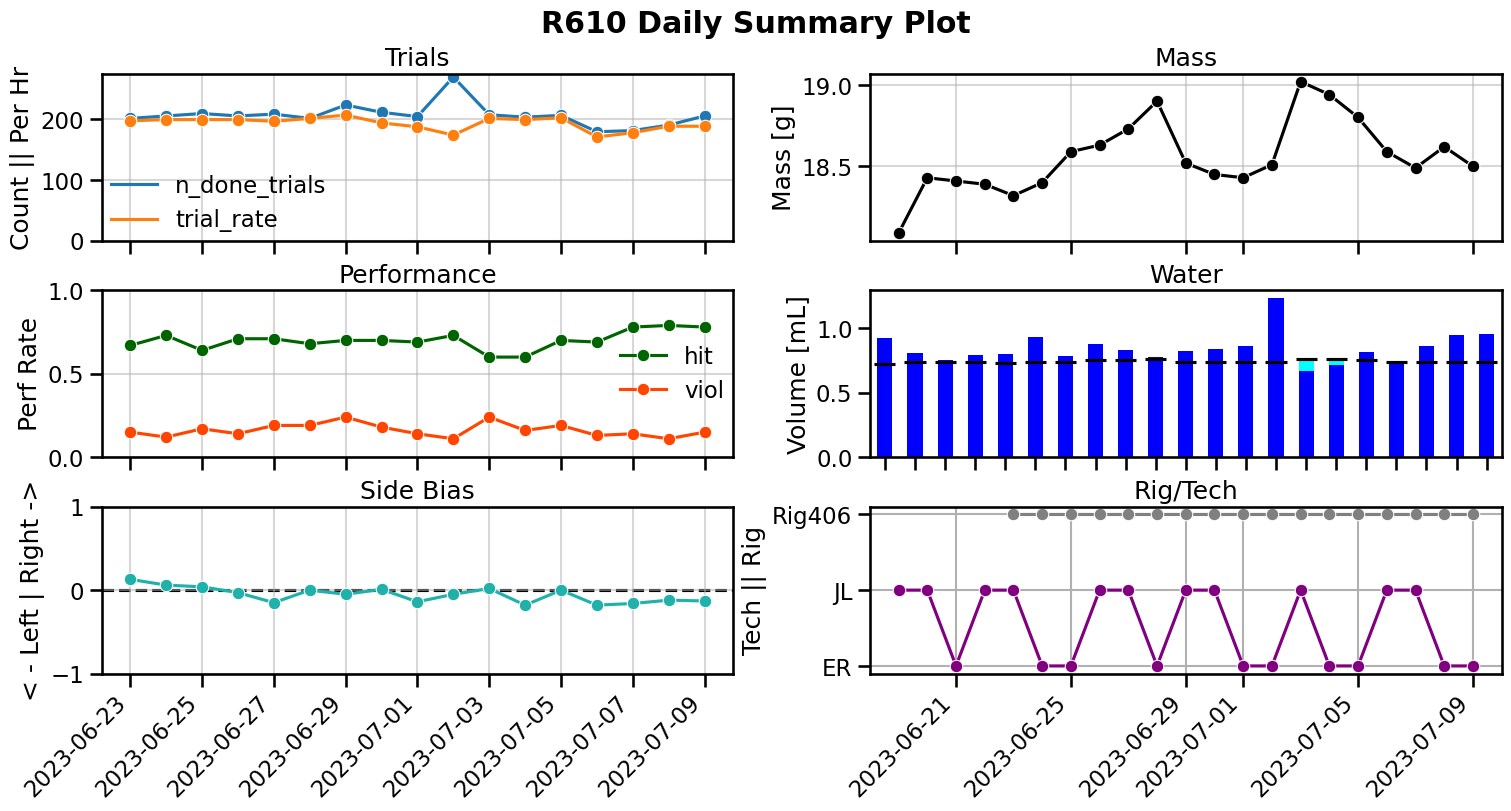

In [19]:
plot_multiday_summary("R610", days_df)

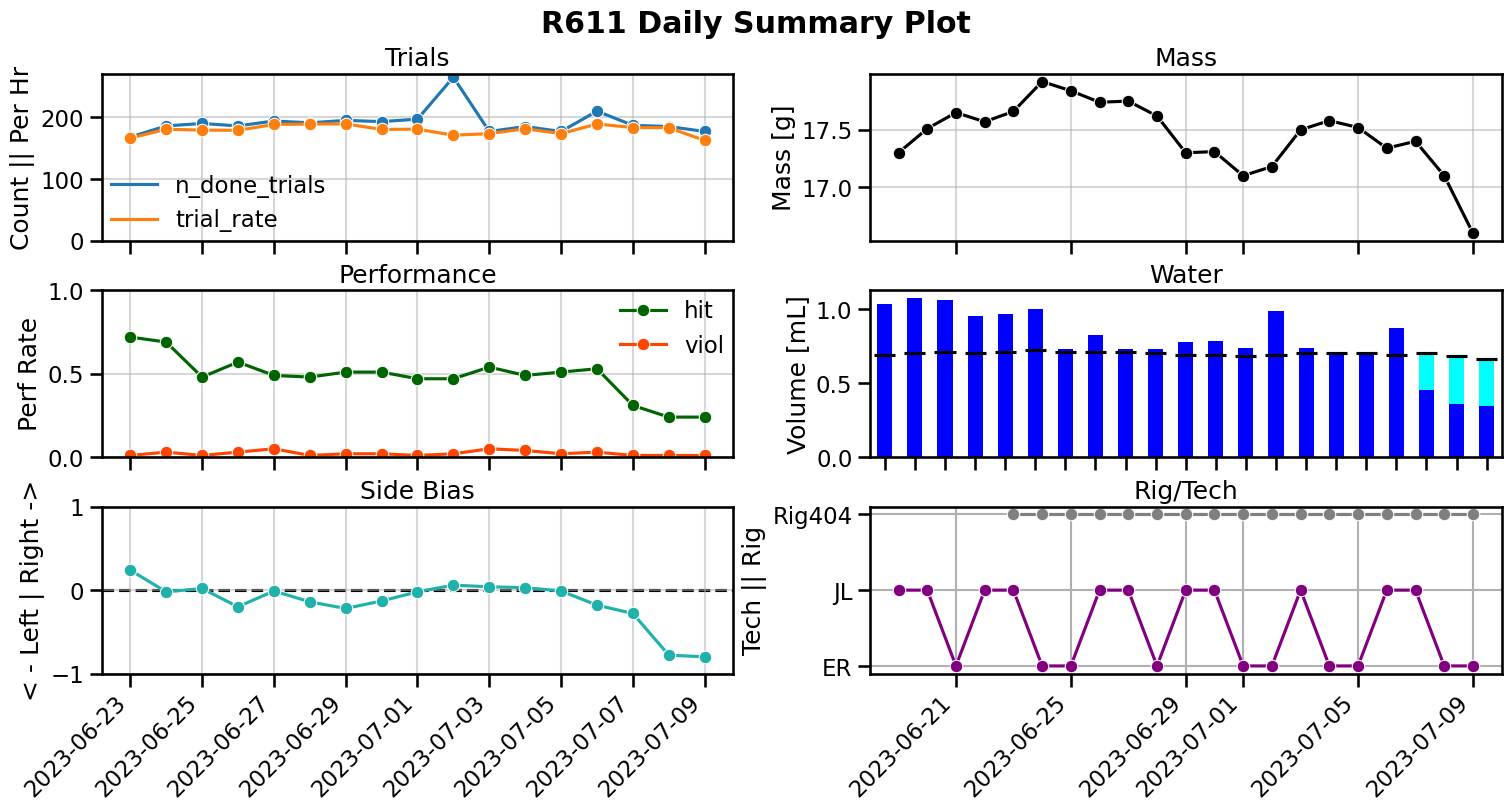

In [20]:
plot_multiday_summary("R611", days_df)

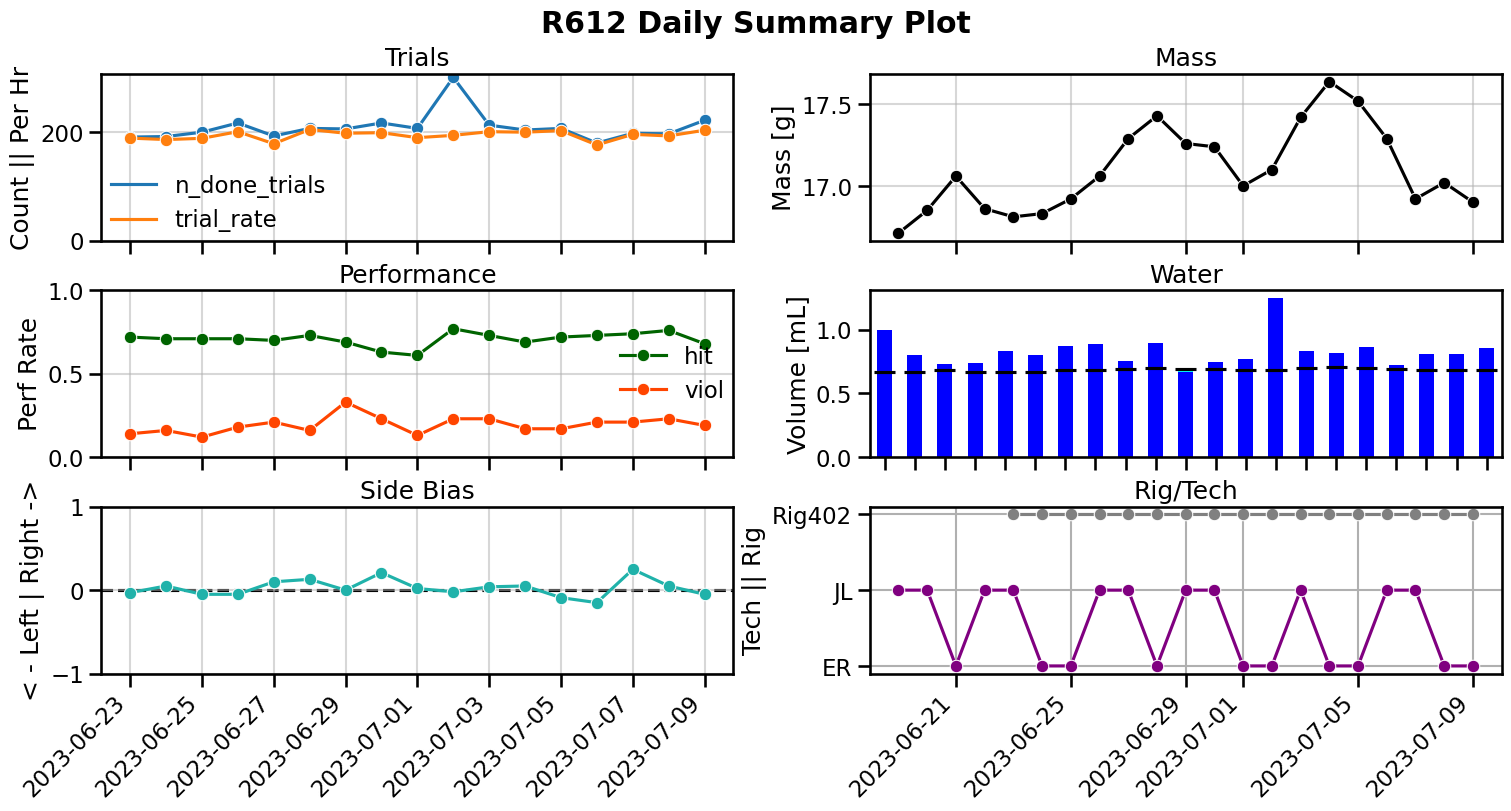

In [21]:
plot_multiday_summary("R612", days_df)

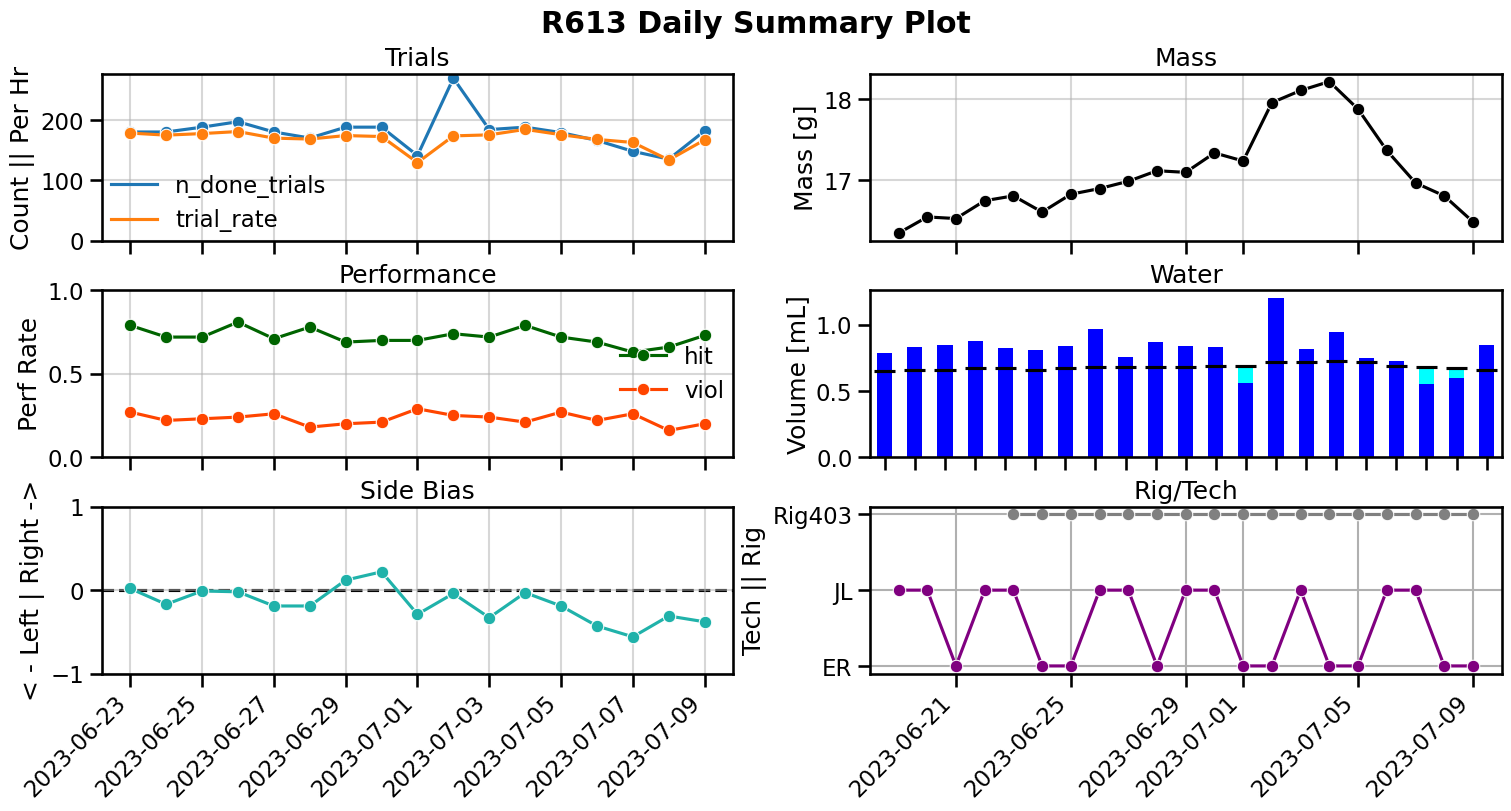

In [22]:
plot_multiday_summary("R613", days_df)

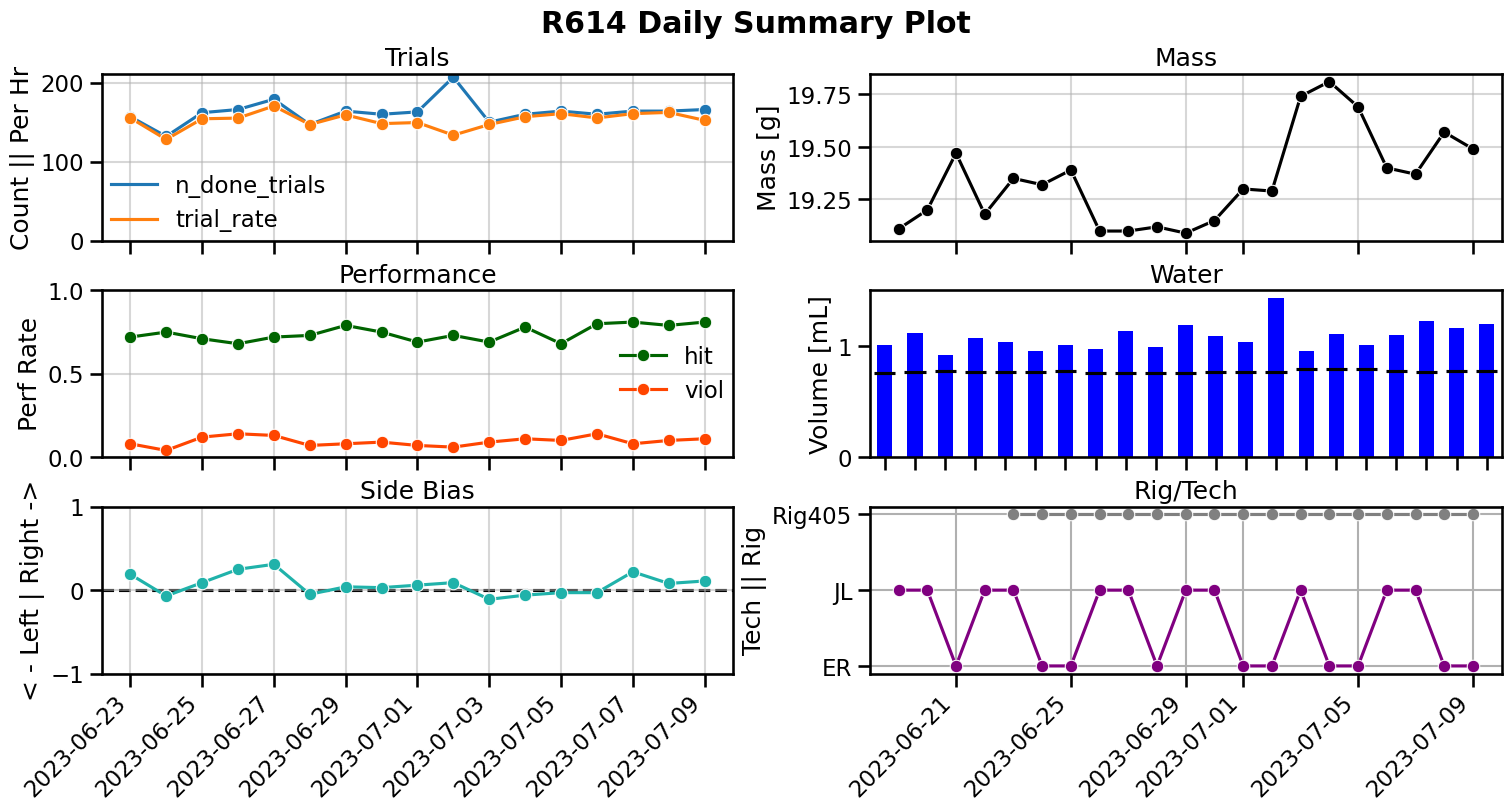

In [23]:
plot_multiday_summary("R614", days_df)

## DEV

In [24]:
# for animal_id, animal_df in days_df.groupby('animal_id'):
#     None
# from plot_days_info import *
# ## Initialize mutli-axis figure
# layout = """
#     AAABBB
#     CCCDDD
#     EEEFFF
# """
# fig = plt.figure(constrained_layout=True, figsize=(15,8))
# ax_dict = fig.subplot_mosaic(layout)  # ax to plot to
# plt.suptitle(f"\nR614 Daily Summary Plot", fontweight="semibold")


# ## Plot
# # left column
# plot_trials(animal_df, ax_dict["A"], title="Trials", legend=True, xaxis_label=False)
# plot_performance(animal_df, ax_dict["C"], title="Performance", xaxis_label=False)
# plot_side_bias(animal_df, ax_dict["E"], title="Side Bias", xaxis_label=True)

# # right column
# plot_mass(animal_df, ax_dict["B"], title="Mass", xaxis_label=False)
# plot_water_restriction(animal_df, ax_dict["D"], title="Water", legend=False, xaxis_label=False)
# plot_rig_tech(animal_df, ax_dict["F"], title="Rig/Tech", xaxis_label=True)

# # plots to add
# # stage plot X
# # time to spoke (or cpoke eventually) *
# # delay dur X
# # trial result plot (stacked or unstacked option, unstacked might be better) X
# # antibias params X
# ## eventually!
# # sessions start time
# # pre go/ viol off X
# # settling, pre go, sa, delay, sb, post sb times across days X
# add go cue dur if go is on?
# # give info, sma info, etc (maybe on oneof those dot plots)
# #
# # stimulus information